In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/Data_Train (1).xlsx')
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df[df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [ ]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10462, 11)

In [ ]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey , format = '%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey , format = '%d/%m/%Y').dt.month
df['Dep_hour'] = pd.to_datetime(df.Dep_Time ).dt.hour
df['Dep_Minute'] = pd.to_datetime(df.Dep_Time ).dt.minute
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time ).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df.Arrival_Time ).dt.minute
df.drop(columns=['Dep_Time', 'Date_of_Journey', 'Arrival_Time'],inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
duration = list(df.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0] ))
    duration_minute.append(int( duration[i].split('m')[0].split()[-1] ))

In [ ]:
df['Duration_Hour'] = duration_hour
df['Duration_Minute'] = duration_minute

In [ ]:
df.drop(columns='Duration',inplace=True)

In [ ]:
Destination = df[['Destination']]

Destination = pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:

Airline = df['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)

In [ ]:
Source = df[['Source']]

Source = pd.get_dummies(Source , drop_first=True)



In [ ]:
df.drop(columns=['Route','Additional_Info'],axis=1 , inplace=True)

In [ ]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
df.replace( { 'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 ,'4 stops':4 } ,inplace=True)

In [ ]:
df = pd.concat( [df , Airline ,Source , Destination] , axis=1)

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(columns = [ 'Airline' , 'Source' , 'Destination' ] , inplace=True)

In [ ]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(10462, 30)

In [ ]:
X = df.drop(columns='Price')
y = df['Price']
X.head()


,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbour = KNeighborsClassifier(n_neighbors=3)
import time
start=time.time()
neighbour.fit(X,y)
print('KNN Score:',neighbour.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

KNN Score: 0.5260391782130912
Time for Training: 1.9299893379211426


In [ ]:
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train,y_train)


SVC()

In [ ]:
clf.support_vectors_

array([[ 0.,  3.,  4., ...,  1.,  0.,  0.],
       [ 0., 21.,  3., ...,  1.,  0.,  0.],
       [ 0., 27.,  3., ...,  1.,  0.,  0.],
       ...,
       [ 1., 18.,  3., ...,  0.,  0.,  1.],
       [ 1., 18.,  3., ...,  0.,  0.,  1.],
       [ 1.,  1.,  3., ...,  0.,  0.,  1.]])

In [ ]:
start=time.time()
clf=clf.fit(X_test,y_test)
print('SVM Score:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score: 0.0926899187768753
Time for Training: 22.940358877182007


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
start=time.time()
mlp=mlp.fit(X_train,y_train)
print('MLP Score:',mlp.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

MLP Score: 0.3516483516483517
Time for Training: 317.32562017440796


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")
start=time.time()
model = model.fit(X_train,y_train)
print("Decission Tree score: ",model.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
print(model.tree_.max_depth)

Decission Tree score:  0.36645962732919257
Time for Training: 0.8471527099609375
24


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
start=time.time()
NB=NB.fit(X_train,y_train)
print("GausianNB score:",NB.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

GausianNB score: 0.24940277114190157
Time for Training: 1.2889063358306885


In [ ]:
from sklearn.linear_model import LinearRegression
start=time.time()
lr=LinearRegression()
lr=lr.fit(X_train,y_train)
print("Linear Regression score : ",lr.score(X_test,y_test))
stop=time.time()
print("Time taken : ",stop-start)

Linear Regression score :  0.6449432810773756
Time taken :  0.06200766563415527


In [ ]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
start=time.time()
logr=logr.fit(X_train,y_train)
print("Logistic Regressor score : ",logr.score(X_test,y_test))
stop=time.time()
print("Time taken : ",stop-start)

Logistic Regressor score :  0.1815575728619207
Time taken :  111.28474283218384


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
start=time.time()
dtr=dtr.fit(X_train,y_train)
print("Tree Regressor score : ",dtr.score(X_test,y_test))
stop=time.time()
print("Time taken : ",stop-start)
print(dtr.tree_.max_depth)

Tree Regressor score :  0.708628049341717
Time taken :  0.1242210865020752
33


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh=KNeighborsRegressor(n_neighbors=5)
start=time.time()
neigh.fit(X_train,y_train)
print("KNN regressor score : ",neigh.score(X_test,y_test))
stop=time.time()
print("Time taken : ",stop-start)

KNN regressor score :  0.5806431274438583
Time taken :  0.482494592666626


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
start=time.time()
dtc = dtc.fit(X_train,y_train)
print("Decission Tree score: ",dtc.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
print(dtc.tree_.max_depth)

Decission Tree score:  0.09507883420926899
Time for Training: 0.10004925727844238
3


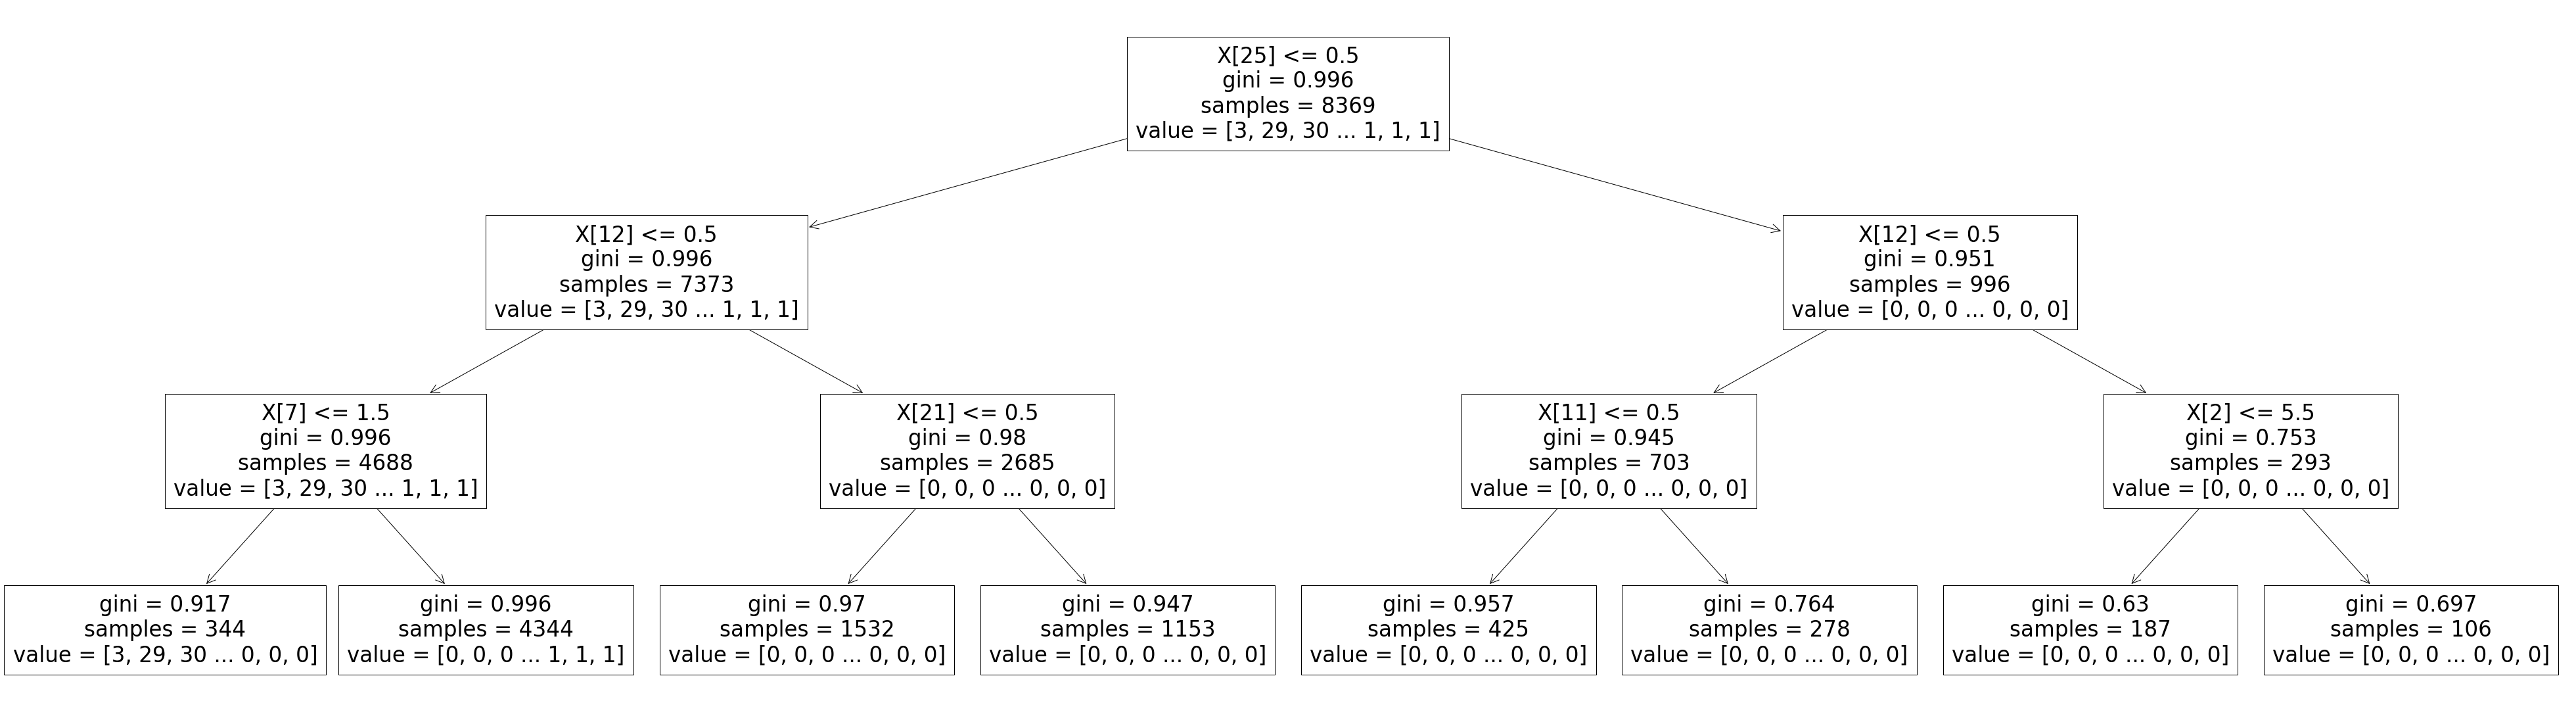

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
tree.plot_tree(dtc)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
print("Random Forest classifier score: ", rfc.score(X_test, y_test))
stop=time.time()
print("Time taken: ", stop-start)

Random Forest classifier score:  0.3387482083134257
Time taken:  29.03307557106018


In [ ]:
from sklearn.ensemble import RandomForestRegressor
start = time.time()
reg = RandomForestRegressor(n_estimators=1000)
reg = reg.fit(X_train,y_train)
print("Random Forest classifier score: ", reg.score(X_test, y_test))
print("Random Forest classifier score: ", reg.score(X_train, y_train))
stop=time.time()
print("Time taken: ", stop-start)

Random Forest classifier score:  0.8136941842151979
Random Forest classifier score:  0.954121568055109
Time taken:  40.30096197128296


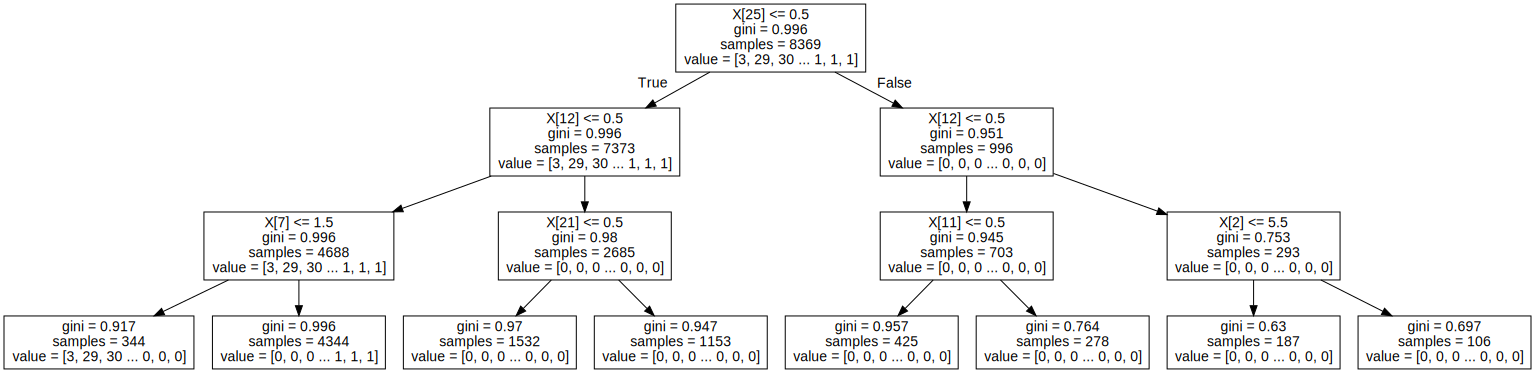

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.ensemble import RandomForestRegressor
start = time.time()
reg = RandomForestRegressor()
reg = reg.fit(X_train,y_train)
print("Random Forest classifier score: ", reg.score(X_test, y_test))
stop=time.time()
print("Time taken: ", stop-start)

Random Forest classifier score:  0.8138233637857681
Time taken:  3.3137741088867188


In [ ]:
import xgboost as xg
start = time.time()
xgb = xg.XGBRegressor(objective = 'reg:linear')
xgb = xgb.fit(X_train,y_train)
print("Random Forest classifier score: ", xgb.score(X_test, y_test))
stop=time.time()
print("Time taken: ", stop-start)

[16:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest classifier score:  0.7541238730427888
Time taken:  0.7735500335693359


In [ ]:
from sklearn.linear_model import Lasso
start = time.time()
la = Lasso()
la = la.fit(X_train,y_train)
print("Random Forest classifier score: ", la.score(X_test, y_test))
stop=time.time()
print("Time taken: ", stop-start)

Random Forest classifier score:  0.5836568776445674
Time taken:  0.057747840881347656


In [ ]:
from sklearn.linear_model import Ridge
start = time.time()
rid = Ridge()
rid = rid.fit(X_train,y_train)
print("Random Forest classifier score: ", rid.score(X_test, y_test))
stop=time.time()
print("Time taken: ", stop-start)

Random Forest classifier score:  0.5839895401939432
Time taken:  0.0629739761352539


In [ ]:
from sklearn.linear_model import ElasticNet
start = time.time()
els = ElasticNet()
els = els.fit(X_train,y_train)
print("Random Forest classifier score: ", reg.score(X_test, y_test))
print("Random Forest classifier score: ", reg.score(X_train, y_train))
stop=time.time()
print("Time taken: ", stop-start)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_pred=reg.predict(X_test)
mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)
print('The r2_score is', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1181.6389921593243
Mean Squared Error: 3881834.3201759574
The r2_score is 0.8138233637857681


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_pred=xgb.predict(X_test)
mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)
print('The r2_score is', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1532.738013488507
Mean Squared Error: 5126585.201787431
The r2_score is 0.7541238730427888


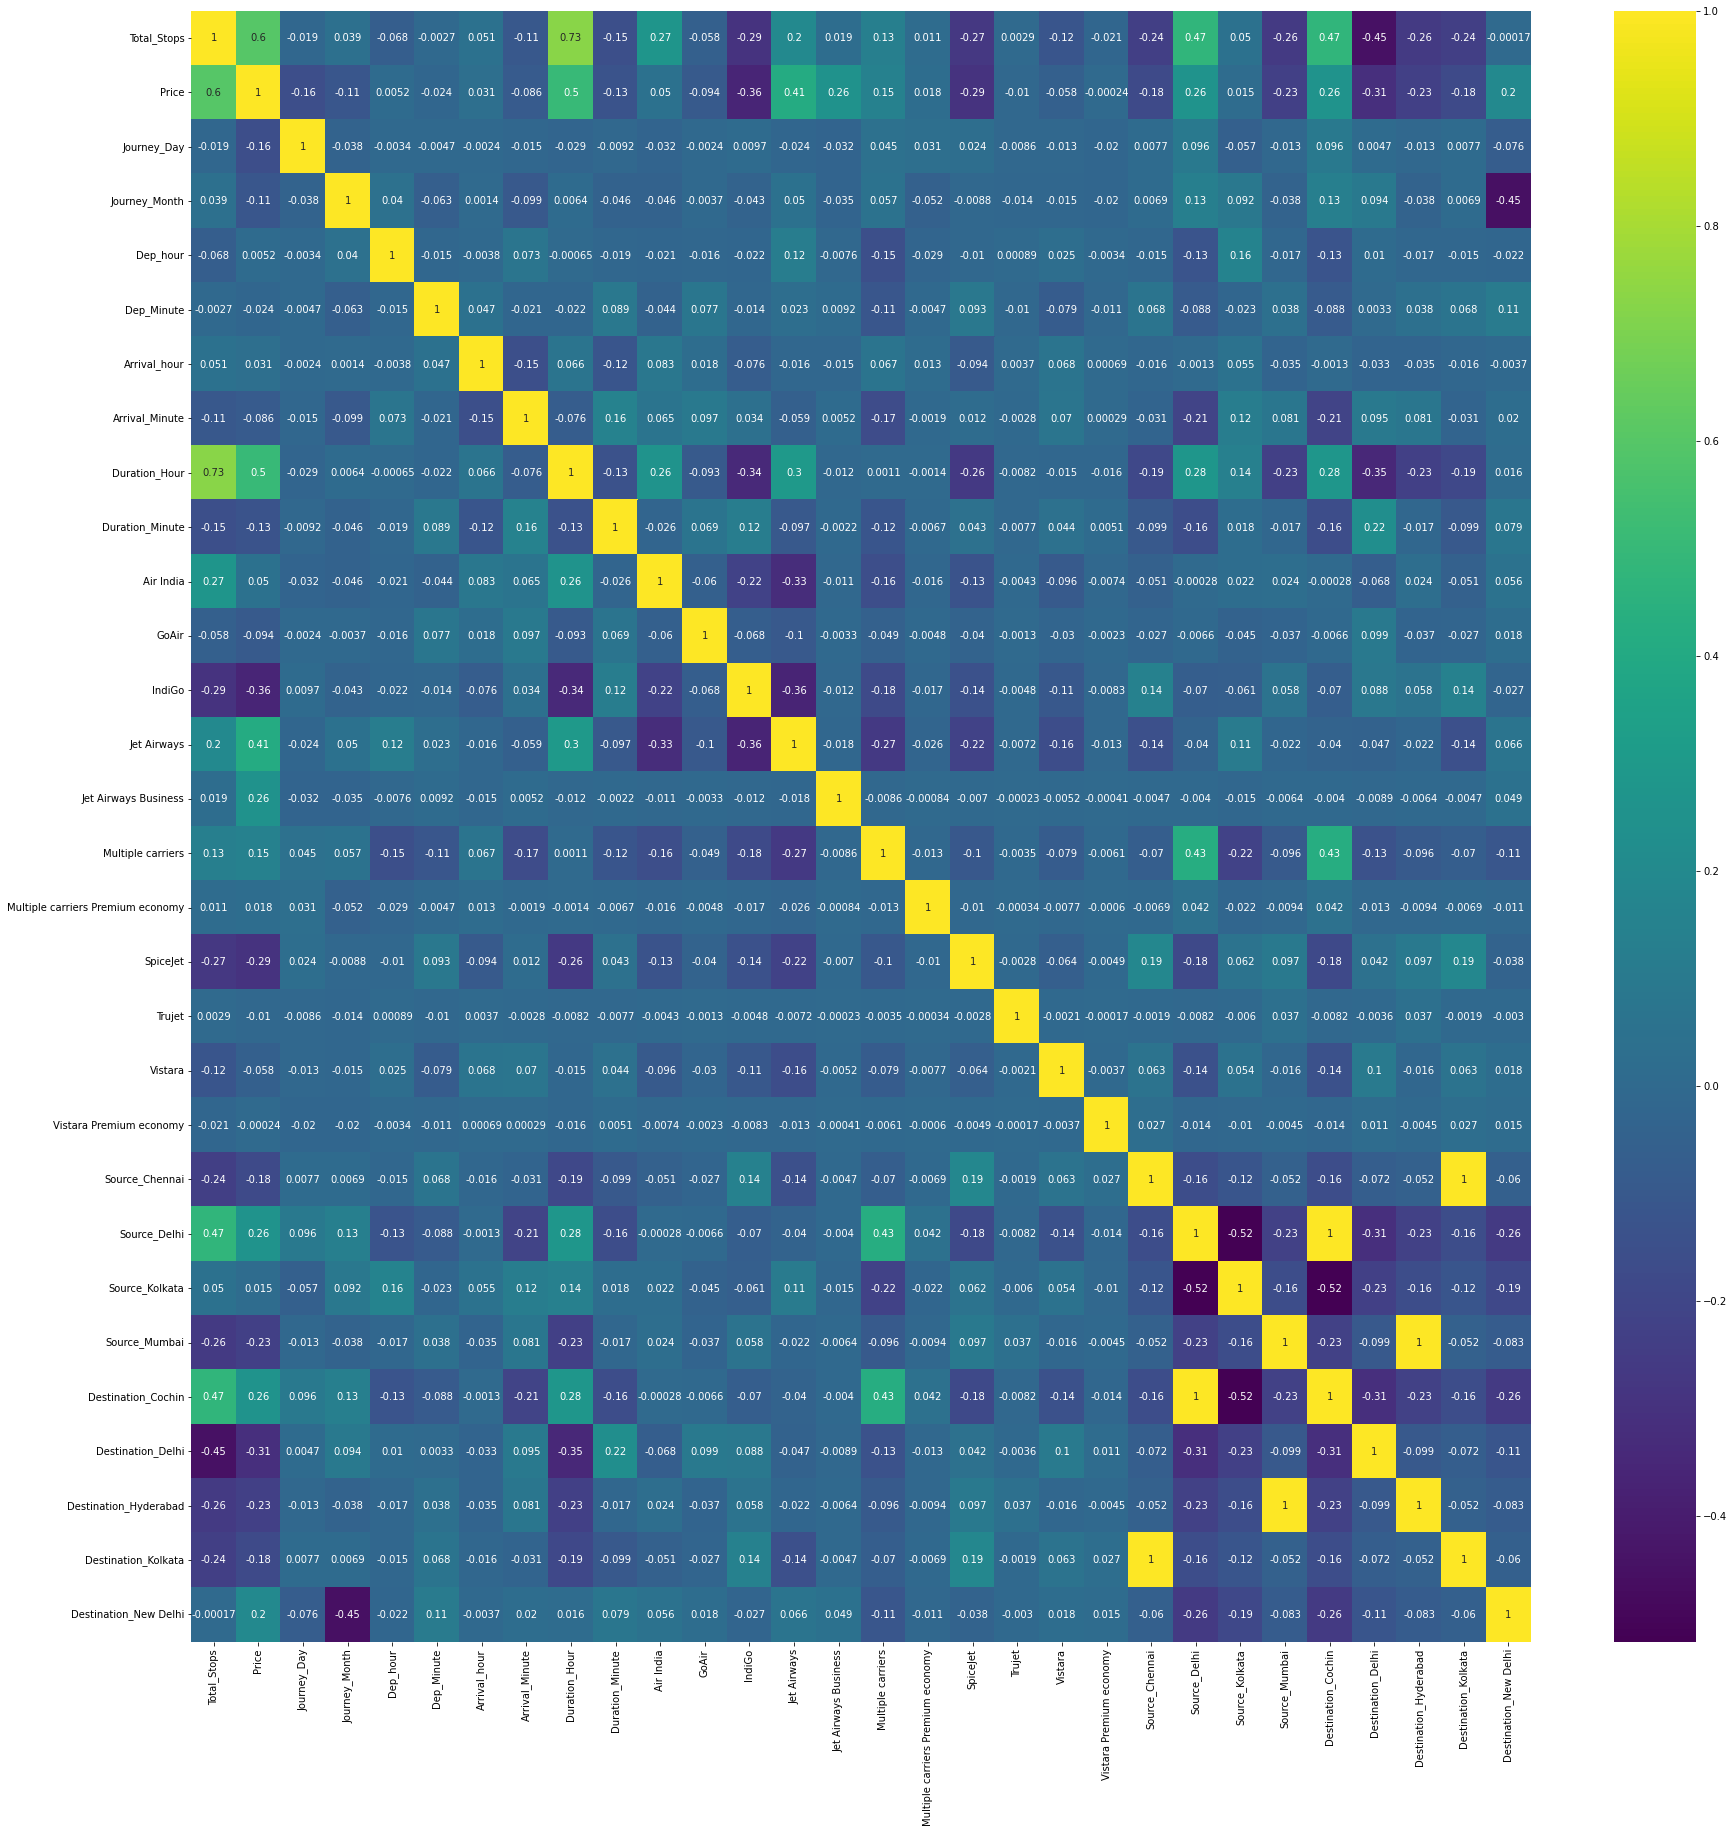

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

[2.22664347e-01 1.46112097e-01 5.27188302e-02 2.38516214e-02
 2.11968105e-02 2.81312291e-02 1.88480651e-02 1.18764642e-01
 1.75224458e-02 1.15227579e-02 1.54314365e-03 1.33542725e-02
 1.38277841e-01 6.91631944e-02 2.15547065e-02 8.86452310e-04
 2.80729592e-03 1.10775336e-04 5.24714500e-03 8.17722826e-05
 4.21439233e-04 1.29960903e-02 3.05983433e-03 7.36219460e-03
 1.10809510e-02 1.69407242e-02 7.61057693e-03 5.37121754e-04
 2.56316221e-02]


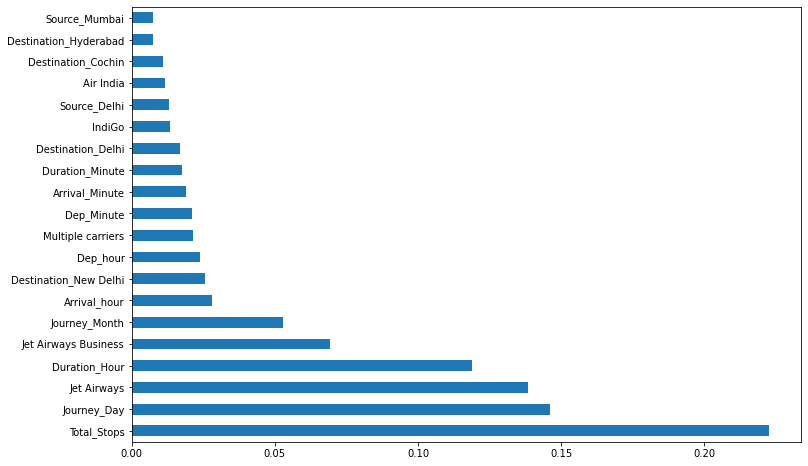

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)
print(etr.feature_importances_)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

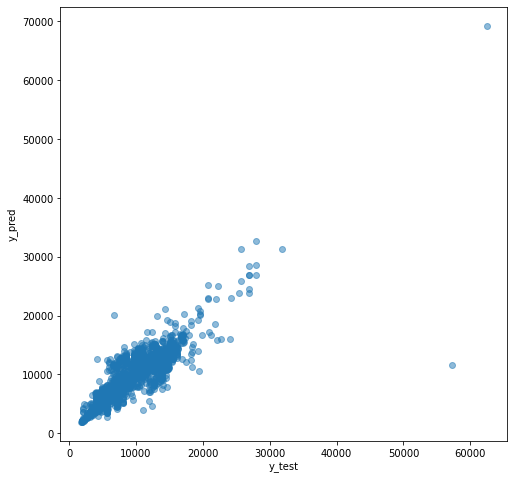

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(df, file)